<a href="https://colab.research.google.com/github/Shriram1906/house-price-prediction/blob/main/House_pricing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

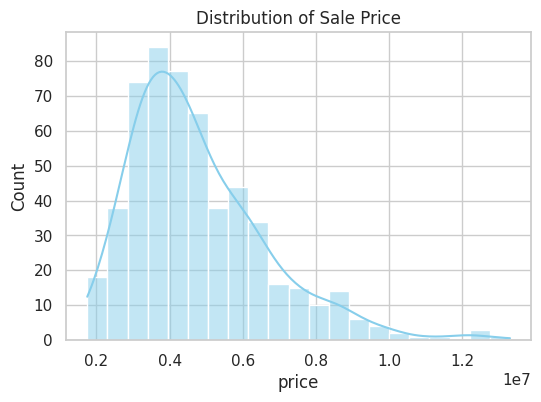

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Housing.csv')

sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='skyblue')  # Update 'price' if the column name differs
plt.title("Distribution of Sale Price")
plt.show()

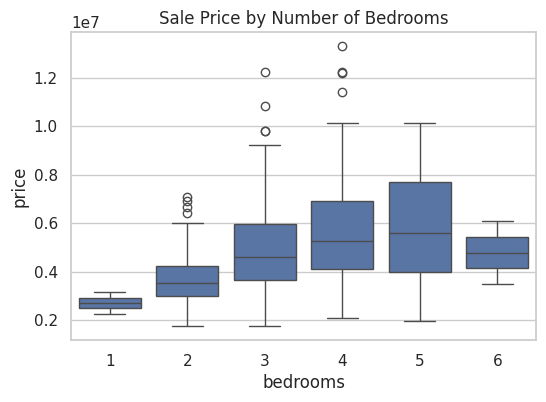

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Sale Price by Number of Bedrooms")
plt.show()

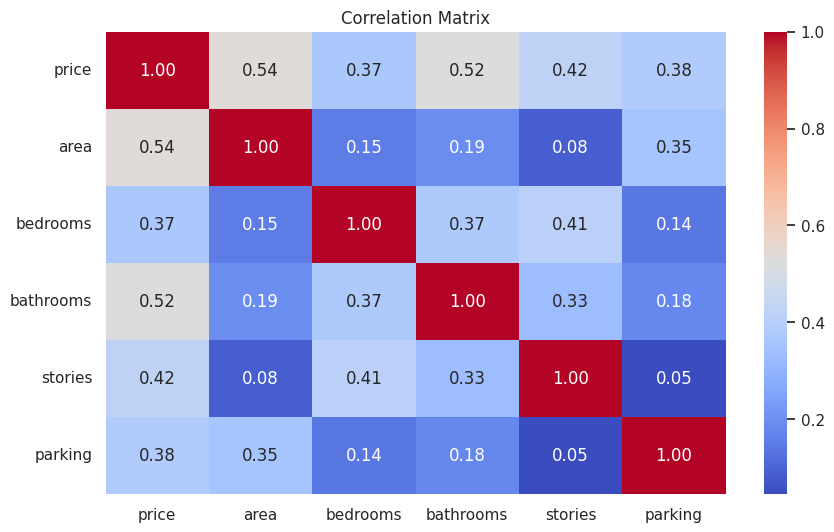

In [ ]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

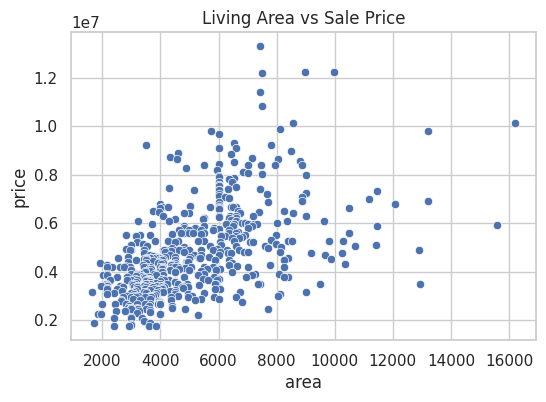

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='price', data=df)
plt.title("Living Area vs Sale Price")
plt.show()

<ipython-input-11-daf0df35edc3>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


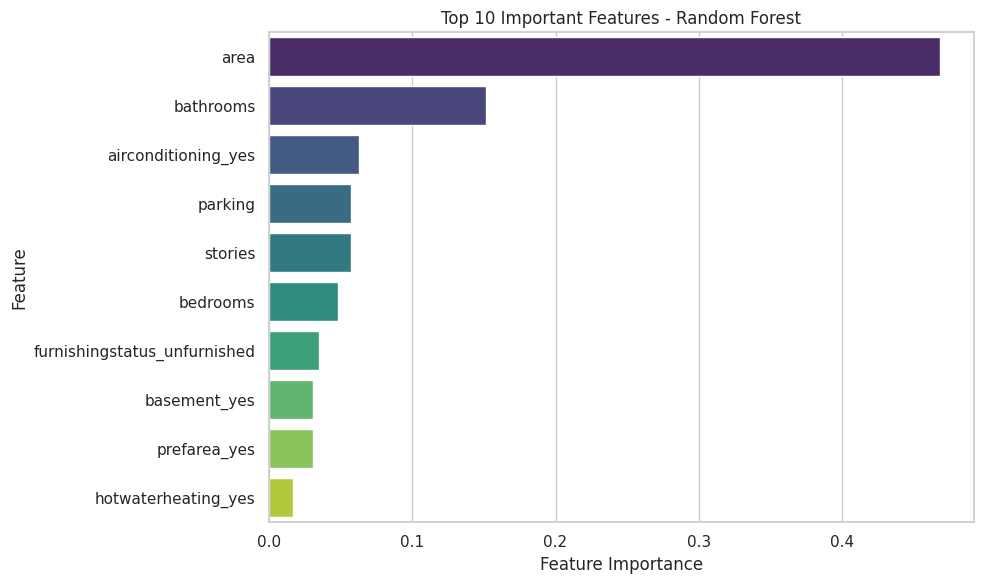

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load your dataset
df = pd.read_csv('Housing.csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract and plot feature importances
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
